# Motorcycle parts
---
```bash
Author: Witchakorn Wanasanwongkot
```

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

# Importing Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8-white')

# Reading in the sales data

In [3]:
# Read file
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

In [4]:
# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [5]:
# Overview of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [6]:
# Checking for null values
df.isna().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [7]:
# Extracting weekday and month name from date
df["weekday"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,weekday,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,Tuesday,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,Tuesday,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,Tuesday,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,Tuesday,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,Tuesday,June


## Total sales for each payment method

In [9]:
df.groupby('payment')['total'].agg(sum).sort_values(ascending=False).reset_index()

,payment,total
0,Transfer,159642.33
1,Credit card,110271.57
2,Cash,19199.10


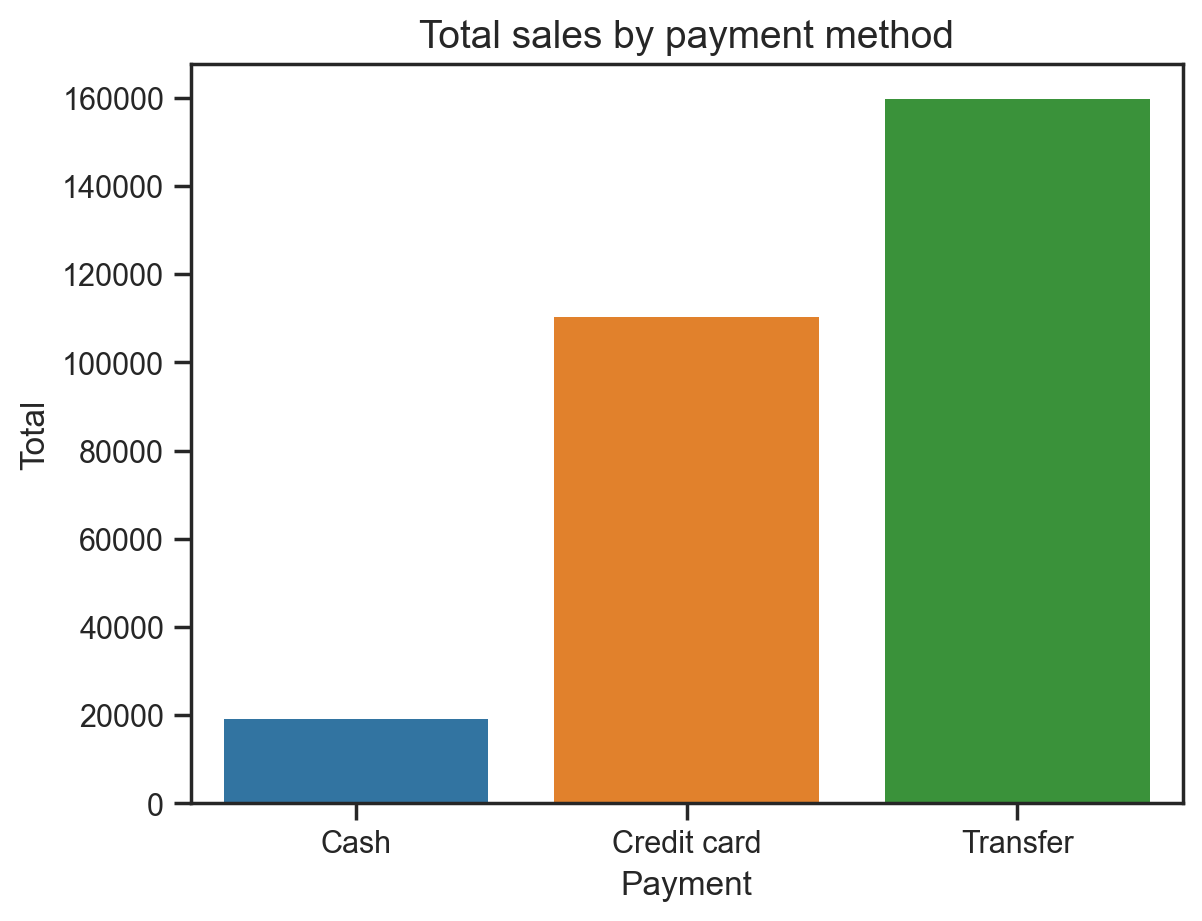

In [57]:
# plt.figure(figsize=(3,3))

total_sales_payment = df.groupby(['payment'])['total'].agg(sum).sort_values(ascending=True).reset_index()

sns.barplot(data=total_sales_payment, x='payment', y='total', errorbar=None)
sns.set_context('notebook')
plt.xlabel("Payment")
plt.ylabel("Total")
plt.title("Total sales by payment method", size=14)
plt.show()

### Observation
- Total sales for **"Transfer"** payment method is the **highest.**

## Average unit price for each product line

In [20]:
df.groupby('product_line')['unit_price'].agg("mean").sort_values(ascending=False).round(2).reset_index()

,product_line,unit_price
0,Engine,60.09
1,Frame & body,42.83
2,Suspension & traction,33.97
3,Electrical system,25.59
4,Miscellaneous,22.81
5,Breaking system,17.74


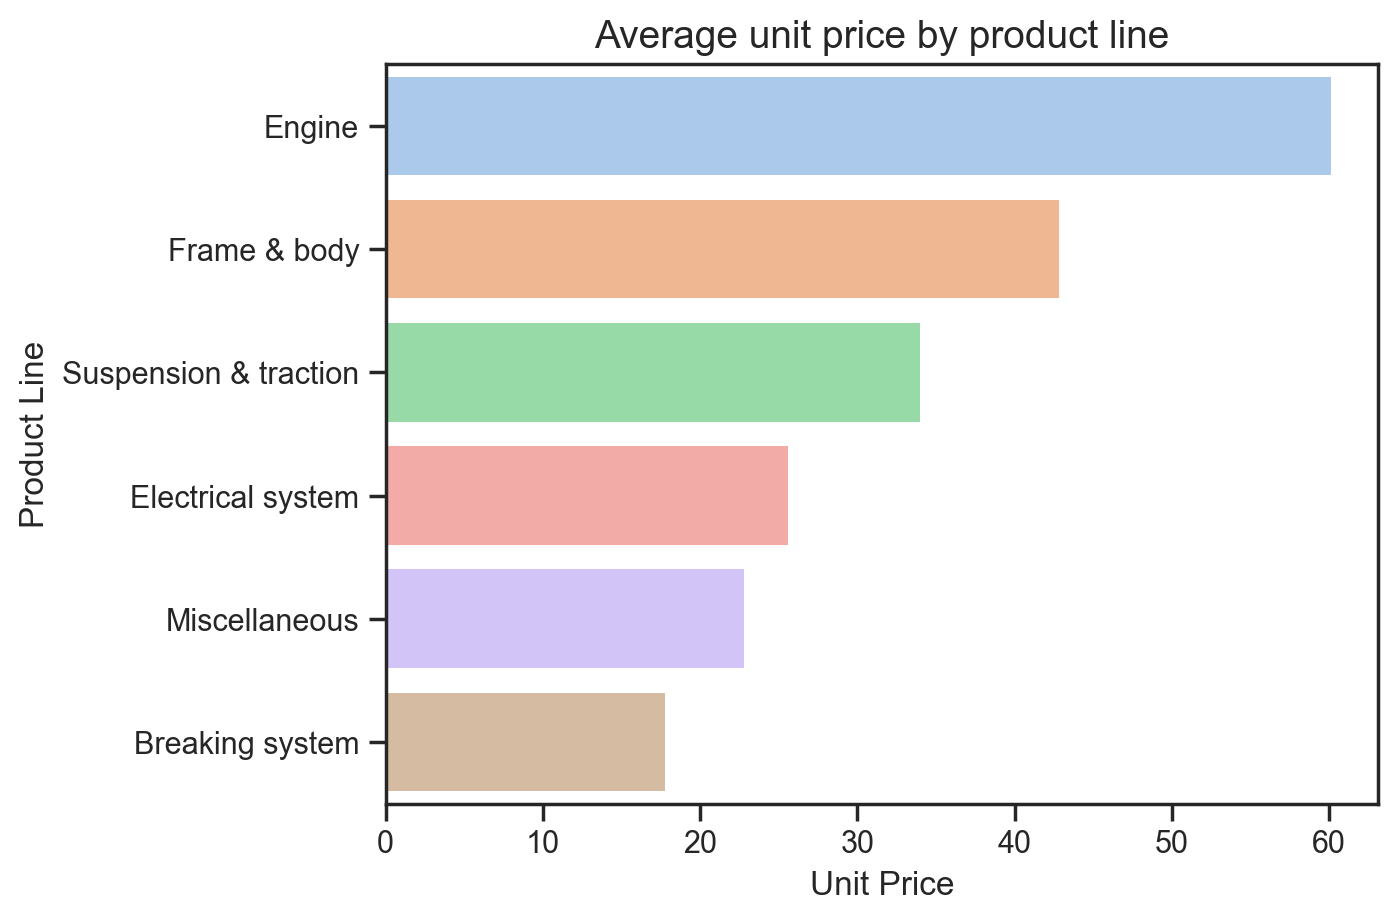

In [56]:
# plt.figure(figsize=(4,3))

avg_product_line = df.groupby(['product_line'])['unit_price'].agg("mean").sort_values(ascending=False).reset_index()

sns.barplot(data=avg_product_line, y='product_line', x='unit_price', palette='pastel',
            errorbar=None).set_title("Average unit price by product line", size=14)
sns.set_context('notebook')
plt.xlabel("Unit Price")
plt.ylabel("Product Line")
plt.show()

### Observation
- Average unit price for **Engine** product line is the **highest.**
- Average unit price for **Breaking system** product line is the **lowest.**

## Average purchase value by client type

In [24]:
df.groupby('client_type')['total'].agg("mean").sort_values(ascending=True).round(2).reset_index()

,client_type,total
0,Retail,167.06
1,Wholesale,709.52


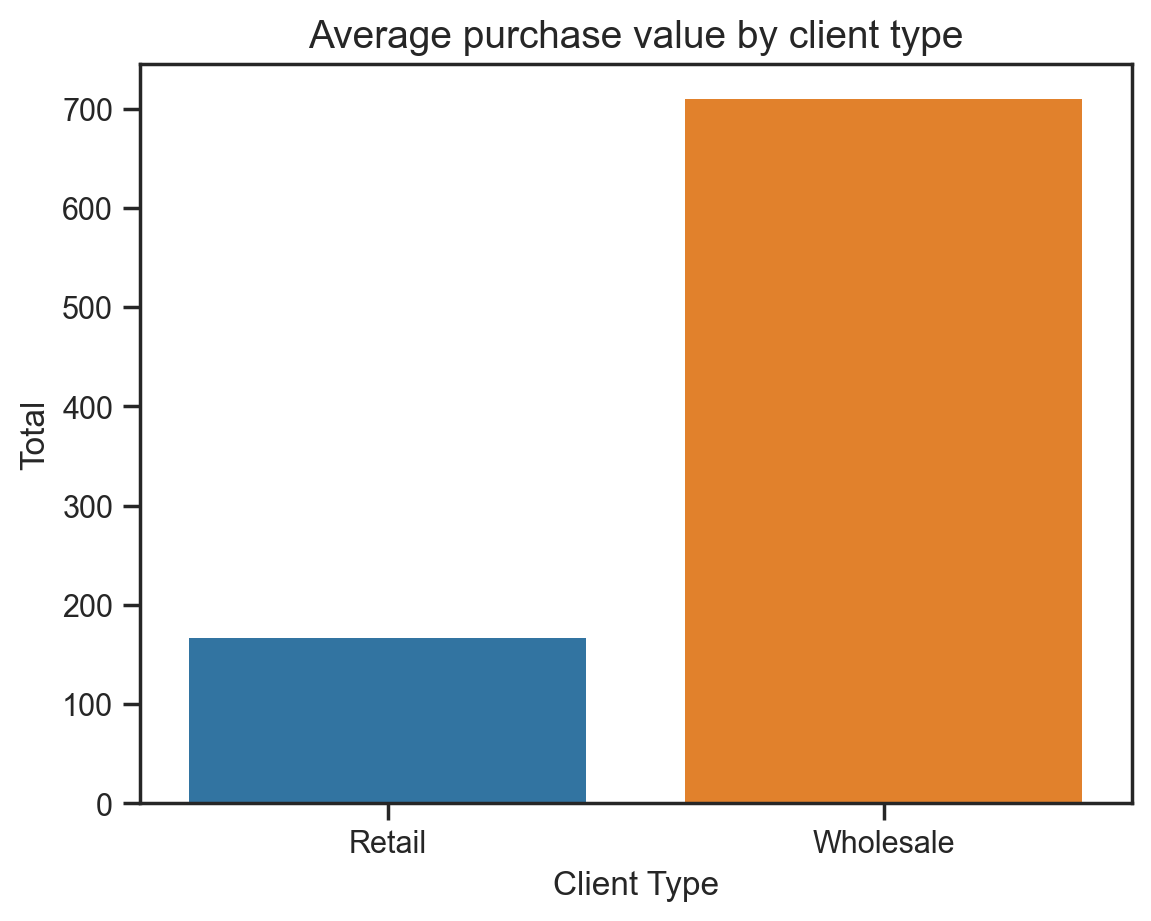

In [55]:
# plt.figure(figsize=(3,3))

avg_sales_client = df.groupby(['client_type'])['total'].agg("mean").sort_values(ascending=True).reset_index()

sns.barplot(data=avg_sales_client, x='client_type', y='total').set_title("Average purchase value by client type", size=14)
sns.set_context('notebook')
plt.xlabel("Client Type")
plt.ylabel("Total")
plt.show()

### Observation
- Average purchase value for **Wholesale** client type is the **highest.**

## Total purchase value by product line

In [28]:
df.groupby('product_line')['total'].agg("sum").sort_values(ascending=True).reset_index()

,product_line,total
0,Miscellaneous,27165.82
1,Engine,37945.38
2,Breaking system,38350.15
3,Electrical system,43612.71
4,Frame & body,69024.73
5,Suspension & traction,73014.21


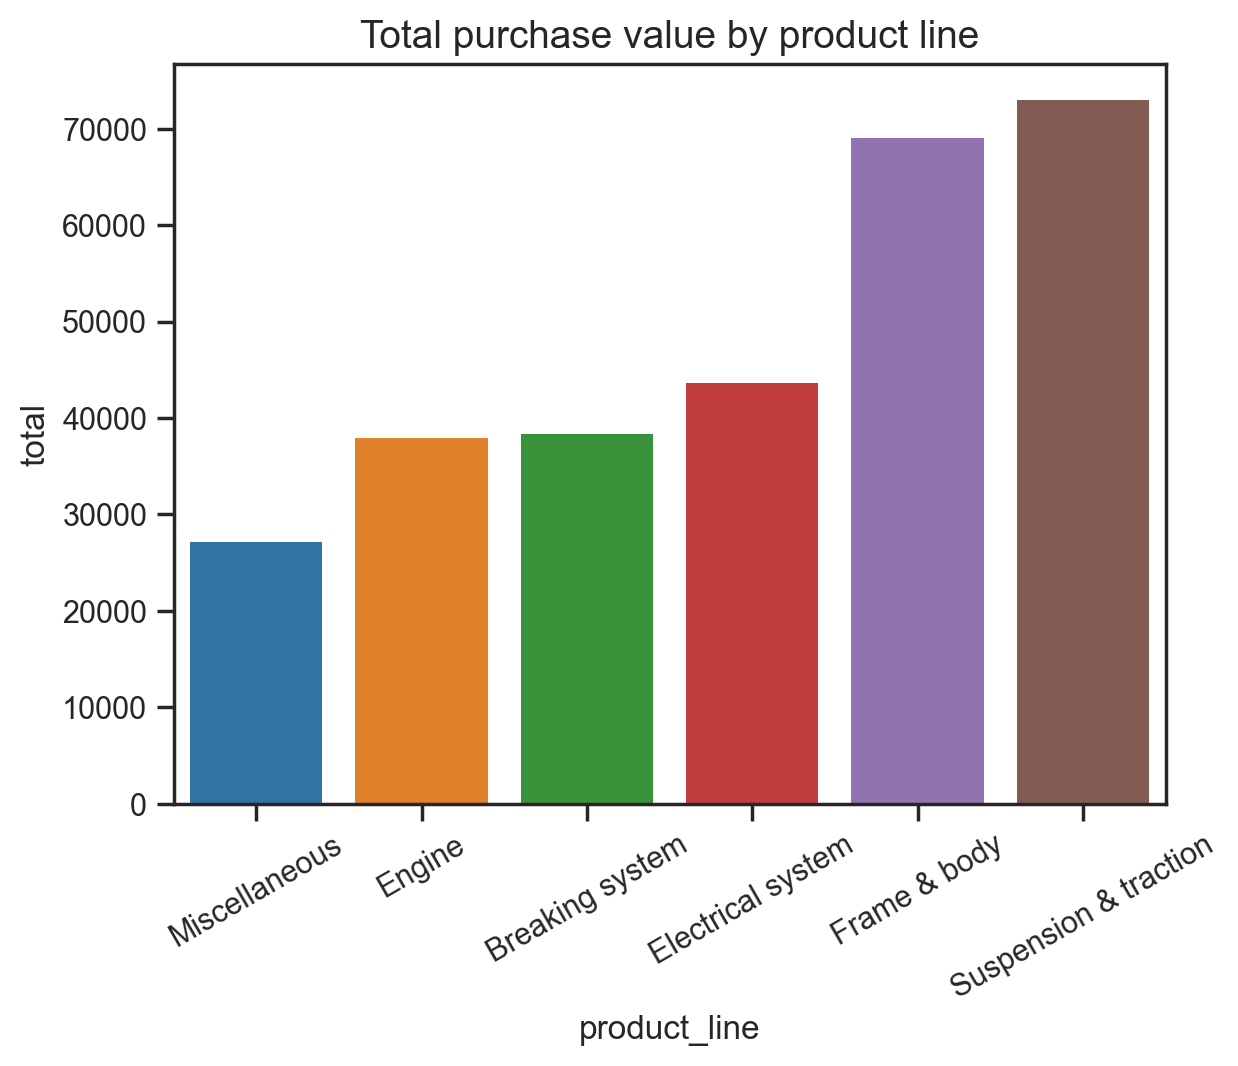

In [54]:
# plt.figure(figsize=(6,4))

total_sales_productline = df.groupby(['product_line'])['total'].agg("sum").sort_values(ascending=True).reset_index()

sns.barplot(data=total_sales_productline, x='product_line', y='total').set_title("Total purchase value by product line", size=14)
plt.xticks(rotation=30)
plt.show()

### Observation
- Total purchase value for **Suspension & traction** product line is the **highest.**
- Total purchase value for **Miscellaneous** product line is the **lowest.**

## Total purchase value for every day of the week

In [33]:
df.groupby('weekday').agg({'total':'sum'}).sort_values(by='total', ascending=False).reset_index()

,weekday,total
0,Tuesday,54313.58
1,Saturday,45115.15
2,Sunday,41151.85
3,Friday,40311.26
4,Wednesday,38850.47
5,Thursday,35314.43
6,Monday,34056.26


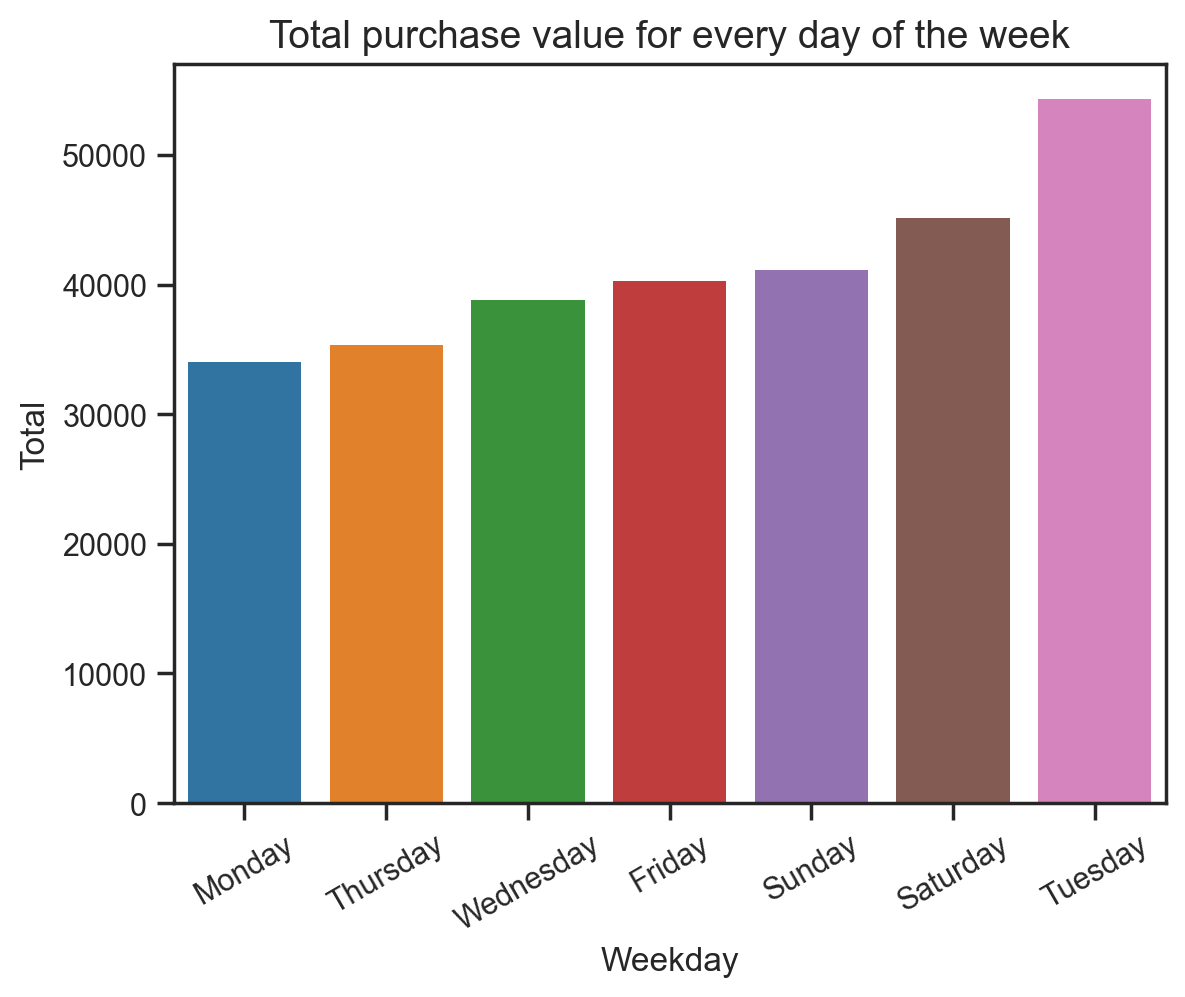

In [53]:
# plt.figure(figsize=(6,4))

total_sales_weekday = df.groupby('weekday').agg({'total':'sum'}).sort_values(by='total', ascending=True).reset_index()

sns.barplot(data=total_sales_weekday, x='weekday', y='total').set_title("Total purchase value for every day of the week", size=14)
plt.xticks(rotation=30)
plt.xlabel("Weekday")
plt.ylabel("Total")
plt.show()

### Observation
- Total purchase value for **Tuesday** is the **highest.**

## Total purchase value for every month

In [35]:
df.groupby('month').agg({'total':'sum'}).sort_values('total', ascending=False).round(2).reset_index()

,month,total
0,August,100245.06
1,June,95320.03
2,July,93547.91


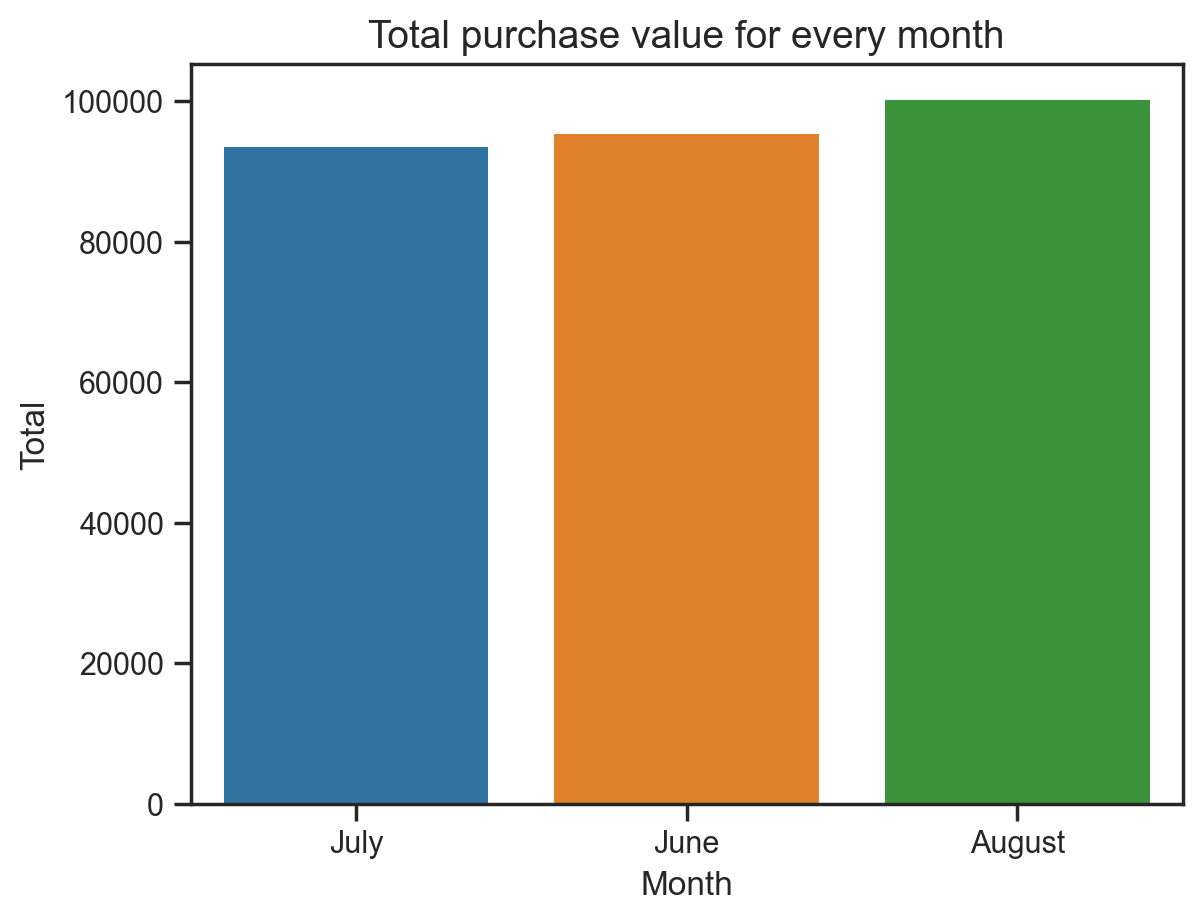

In [52]:
# plt.figure(figsize=(4,3))

total_sales_month = df.groupby('month').agg({'total':'sum'}).sort_values('total', ascending=True).reset_index()

sns.barplot(data=total_sales_month, x='month', y='total').set_title("Total purchase value for every month", size=14)
plt.xlabel("Month")
plt.ylabel("Total")
plt.show()

### Observation
- Total purchase value for **August** is the **highest.**

## Total purchase value with client type and warehouse

In [44]:
pd.crosstab(df['client_type'], df['warehouse'], values=df['total'], aggfunc='sum').round(2)

warehouse,Central,North,West
client_type,,,
Retail,63126.12,42137.36,24207.19
Wholesale,78856.76,58066.27,22719.30


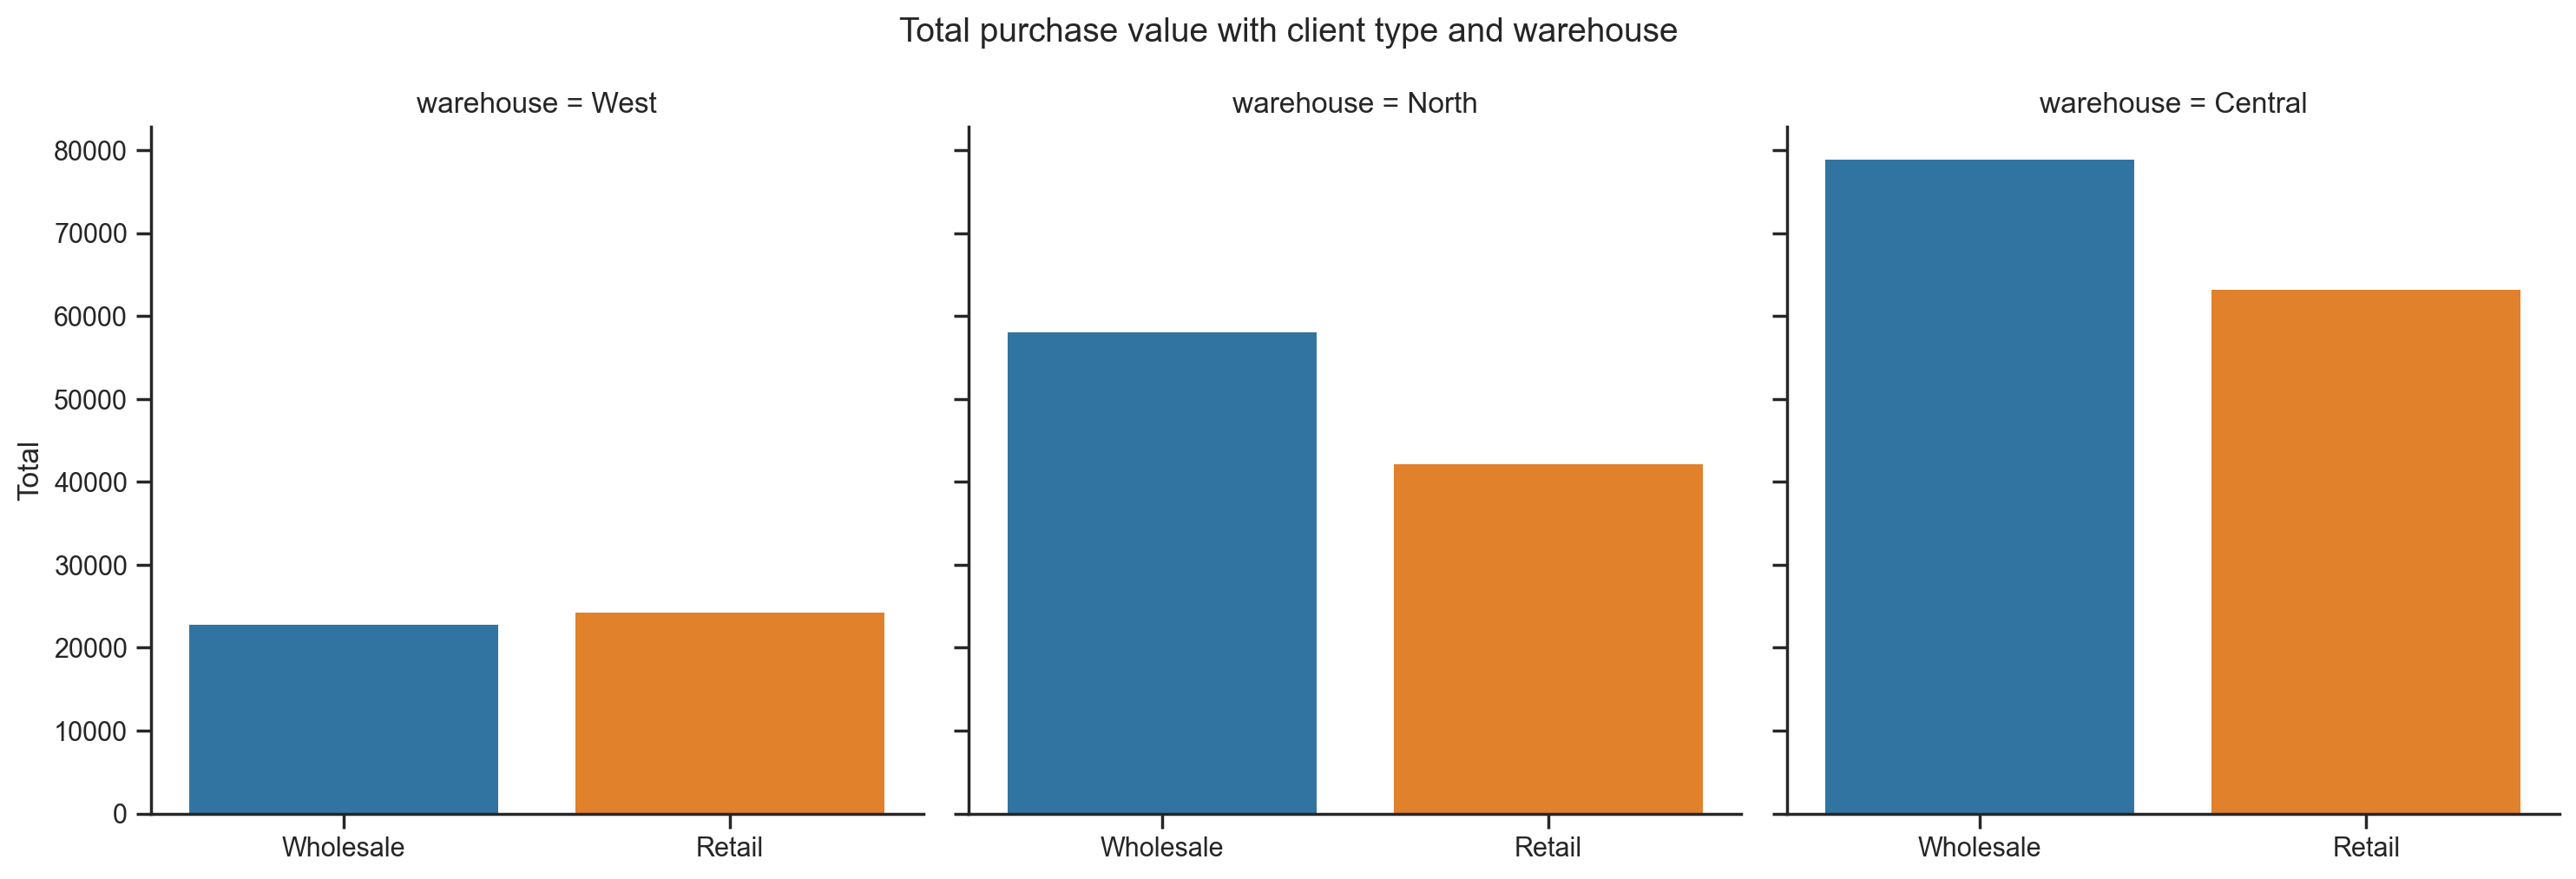

In [48]:
total_sales_warehouse_client = df.groupby(['warehouse', 'client_type']).agg({'total':'sum'}).sort_values('total', ascending=True).reset_index()

g = sns.catplot(data=total_sales_warehouse_client, kind='bar', x='client_type', y='total', col='warehouse', errorbar=None)
g.set_axis_labels("", "Total")
plt.suptitle("Total purchase value with client type and warehouse", size=14, y=1.05)
plt.show()

### Observation
- Total purchase value with client type in **Central** warehouse is the **highest.** Which is the amount of "Wholesale" is **greater than** "Retail". Compared to the **West** warehouse which is the amount of "Wholesale" is **less than** "Retail".

## Total purchase value with payment type and warehouse

In [46]:
pd.crosstab(df['payment'], df['warehouse'], values=df['total'], aggfunc='sum').round(2)

warehouse,Central,North,West
payment,,,
Cash,7256.23,7527.03,4415.84
Credit card,55869.89,34610.33,19791.35
Transfer,78856.76,58066.27,22719.30


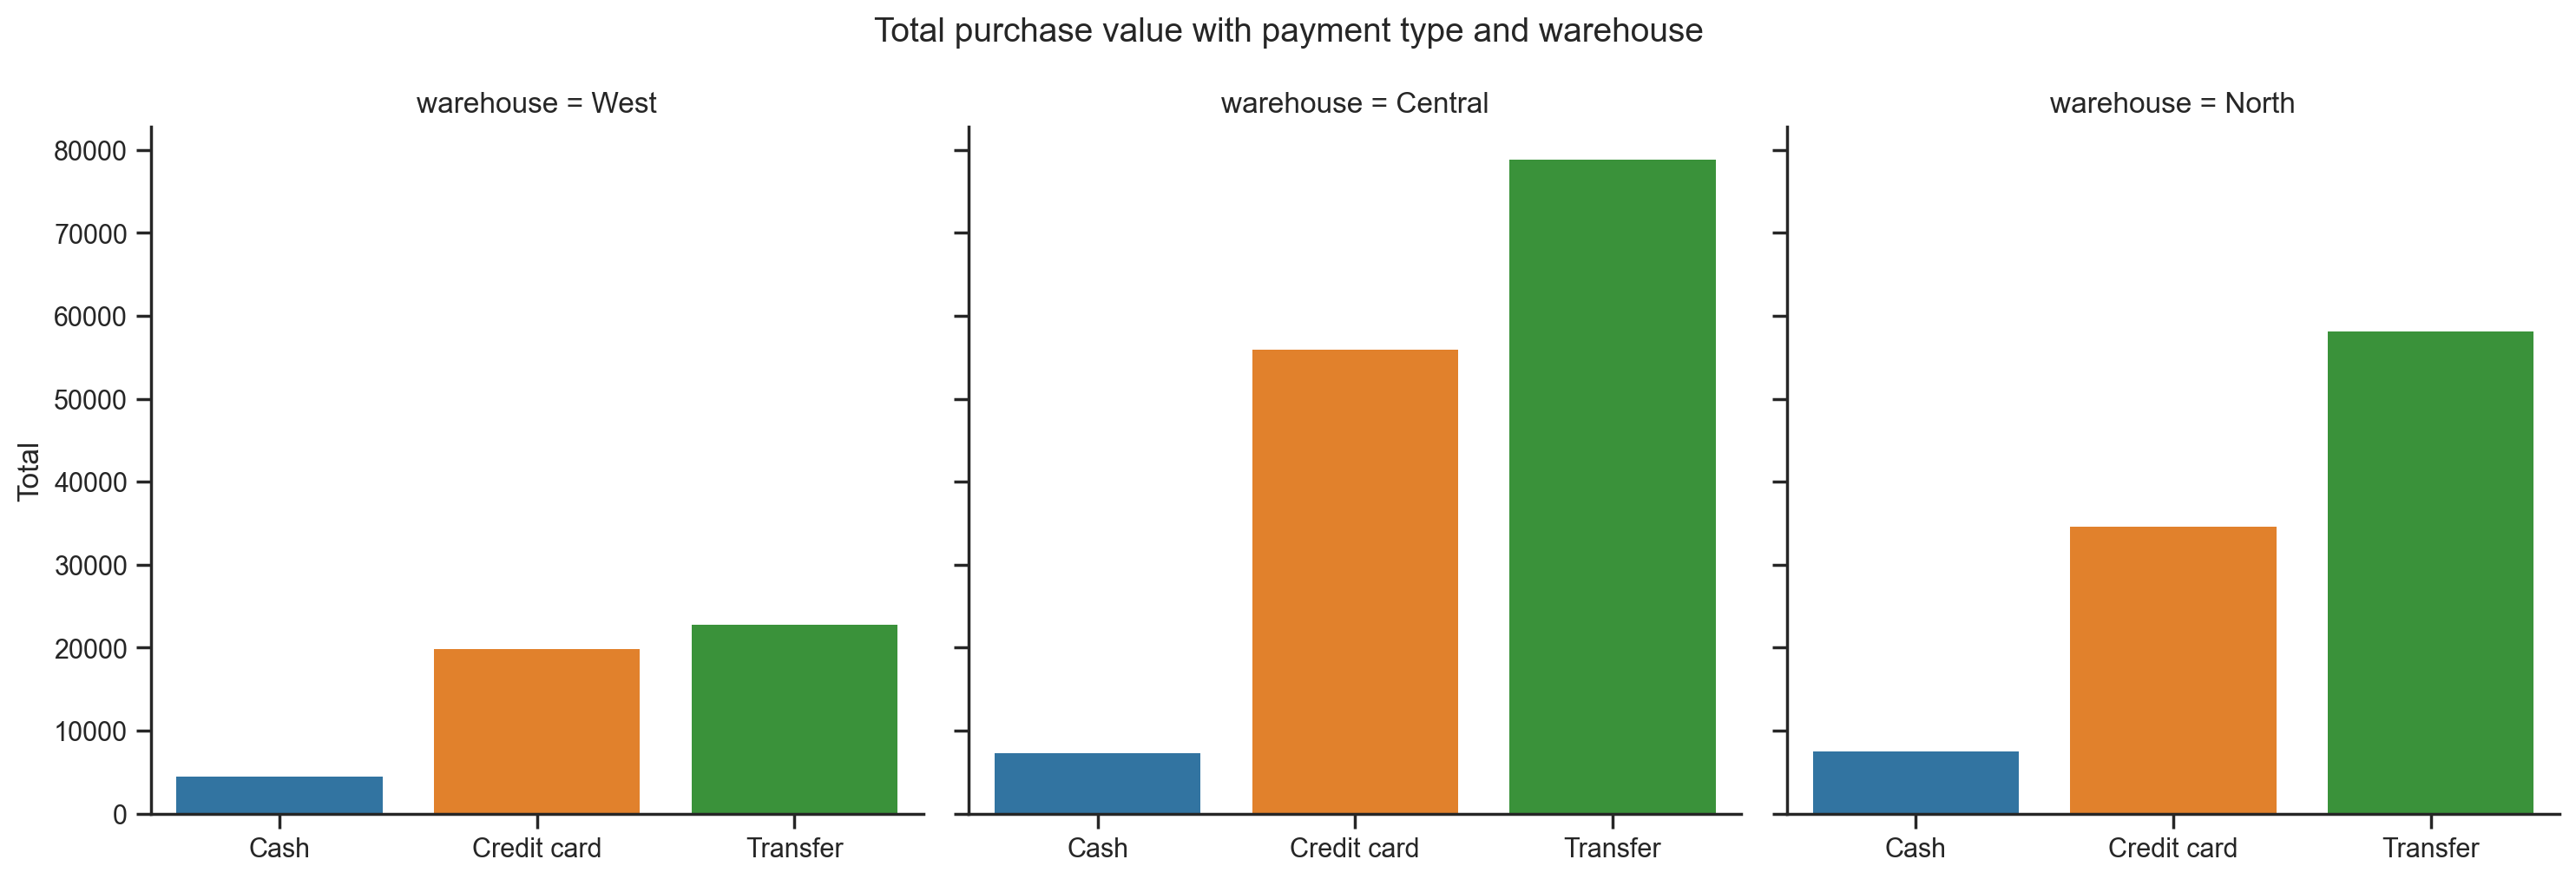

In [49]:
total_sales_warehouse_payment = df.groupby(['warehouse', 'payment']).agg({'total':'sum'}).sort_values('total', ascending=True).reset_index()

g = sns.catplot(data=total_sales_warehouse_payment, kind='bar', x='payment', y='total', col='warehouse', errorbar=None)
g.set_axis_labels("", "Total")
plt.suptitle("Total purchase value with payment type and warehouse", size=14, y=1.05)
plt.show()

### Observation
- Total purchase value with payment type and warehouse in **Central** is the **highest.**

## Total purchase value with product line by month

In [50]:
pd.crosstab(df['product_line'], df['month'], values=df['total'], aggfunc='sum').round(2)

month,August,July,June
product_line,,,
Breaking system,11589.34,15290.89,11469.92
Electrical system,16635.01,14967.00,12010.70
Engine,15898.98,10344.96,11701.44
Frame & body,25677.22,18468.81,24878.70
Miscellaneous,7028.00,10963.32,9174.50
Suspension & traction,23416.51,23512.93,26084.77


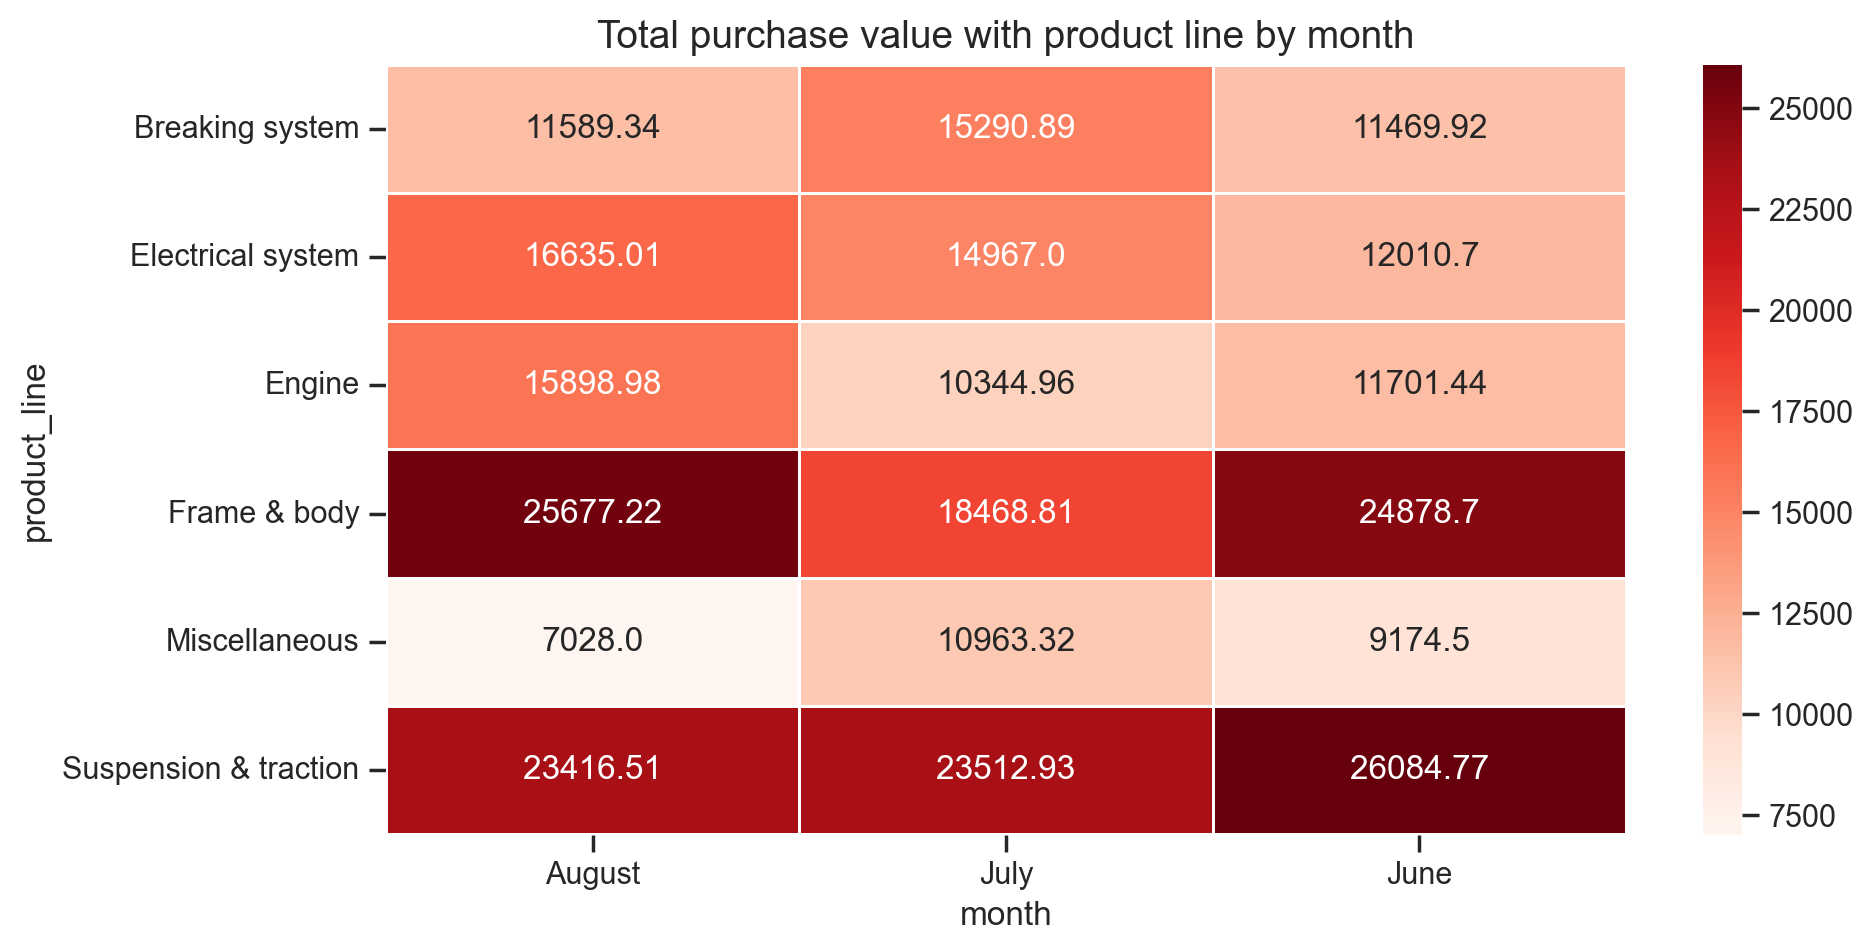

In [51]:
df_crosstab = pd.crosstab(df['product_line'], df['month'], values=df['total'], aggfunc='sum').round(2)

plt.figure(figsize=(10,5))

g = sns.heatmap(df_crosstab, annot=True, fmt='', cmap='Reds', linewidths=0.5)
g.set_title("Total purchase value with product line by month", size=14)

plt.show()

### Observation
- Month of **June** is having **maximum** total sales in **Suspension & traction** product line, whereas month of **August** is having **minimum** total sales in **Miscellaneous** product line.